# [NML23] Assignment 1B: Network Models

TAs: [Ortal Senouf](https://people.epfl.ch/ortal.senouf) and [William Cappelletti](https://people.epfl.ch/william.cappelletti)

## Students

* Team: `20`
* Students: `Hugo Fluhr`, `Nino Herve`

## Rules

> ⚠️ **Read carefully before starting**

**Deadline:** March 28th

**Grading:**
* The integrality of Assignment 1 will be scaled to 100% and will amount to 25% of the overall assignments score.
* The total number of points for part B is **52**, the points for each exercise are stated in the instructions.
* All team members will receive the same grade based on the team solution.
* Collaboration between team members is encouraged. No collaboration between teams is allowed.

**Expected output:**

You will have coding and theoretical questions. Coding exercises shall be solved within the specified space:
```python
# Your solution here ###########################################################
...
#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
```
Anything outside shall not be touched, except if otherwise stated.

Theoretical questions shall be answered in the following markdown cell. The first line will be 
> **Your answer here:**

**Submission:**
* Your submission is self-contained in the `.ipynb` file.

* Code has to be clean and readable. Provide meaningful variable names and comment where needed.

* Textual answers in [markdown cells][md_cells] shall be short: one to two
  sentences. Math shall be written in [LaTeX][md_latex].
    **NOTE**: handwritten notes pasted in the notebook are ignored

* You cannot import any other library than we imported.
  Note that Networkx is imported in the second section and cannot be used in the first except for the Question 4 of Section 1 (at the indicated portion only).

* Make sure all cells are executed before submitting. I.e., if you open the notebook again it should show numerical results and plots. Cells not run are ignored.

* Execute your notebook from a blank state before submission, to make sure it is reproducible. You can click "Kernel" then "Restart Kernel and Run All Cells" in Jupyter. We might re-run cells to ensure that the code is working and corresponds to the results.

[md_cells]: https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html
[md_latex]: https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html#LaTeX-equations

## Objective

The purpose of this assignment is to explore a given dataset, represent it by network by constructing different graphs. In the first section, you analyzed various network properties. In this second section, you will explore various network models and find out the network model fitting the ones you construct from the dataset.

In [1]:
!pip install networkx==3.0 -q
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1Ze-vDx_cMr7iNkivv8LLhniEtp4RD1ug' -O data_1b.pickle

--2023-03-28 17:05:25--  https://docs.google.com/uc?export=download&id=1Ze-vDx_cMr7iNkivv8LLhniEtp4RD1ug
Resolving docs.google.com (docs.google.com)... 173.194.69.138, 173.194.69.102, 173.194.69.101, ...
Connecting to docs.google.com (docs.google.com)|173.194.69.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-14-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/qihlv5gg5hq6q7f75ltuscobo06hdv1t/1680023100000/09510815484399706520/*/1Ze-vDx_cMr7iNkivv8LLhniEtp4RD1ug?e=download&uuid=b10dbfbf-b795-4ad5-b78f-eaea9d37c0b3 [following]
--2023-03-28 17:05:25--  https://doc-14-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/qihlv5gg5hq6q7f75ltuscobo06hdv1t/1680023100000/09510815484399706520/*/1Ze-vDx_cMr7iNkivv8LLhniEtp4RD1ug?e=download&uuid=b10dbfbf-b795-4ad5-b78f-eaea9d37c0b3
Resolving doc-14-9o-docs.googleusercontent.com (doc-14-9o-docs.googleusercontent.com)... 108.177.119.132, 2a00:1450

In [2]:
import pickle

import matplotlib.pyplot as plt
import numpy as np

with open("data_1b.pickle", "rb") as f:
    data_1b = pickle.load(f)
f.close()
A_citation = data_1b['cit_graph']
A_feature_pruned = data_1b['feat_graph']

## Section B: Network Models

In this section, you will analyze the feature and citation graphs you constructed in the previous section in terms of the network model types.
For this purpose, you can use the NetworkX libary imported below. **Notice** that the citation and features adjency matrices were given to you in the previous code block.  

In [3]:
import networkx as nx

The next cell creates NetworkX graph objects from the adjacency matrices computed in the previous section. 

In [4]:
G_citation = nx.from_numpy_array(A_citation)
print('Number of nodes: {}, Number of edges: {}'. format(G_citation.number_of_nodes(), G_citation.number_of_edges()))
print('Number of self-loops: {}, Number of connected components: {}'. format(nx.number_of_selfloops(G_citation), nx.number_connected_components(G_citation)))

Number of nodes: 418, Number of edges: 827
Number of self-loops: 0, Number of connected components: 16


In the rest of this assignment, we will consider the pruned feature graph as the feature network.

In [5]:
G_feature = nx.from_numpy_array(A_feature_pruned)
print('Number of nodes: {}, Number of edges: {}'. format(G_feature.number_of_nodes(), G_feature.number_of_edges()))
print('Number of self-loops: {}, Number of connected components: {}'. format(nx.number_of_selfloops(G_feature), nx.number_connected_components(G_feature)))

Number of nodes: 418, Number of edges: 2364
Number of self-loops: 0, Number of connected components: 324


### Question 5 [8pt]: Simulation with the Erdős–Rényi (ER) random model

Create an ER graph using NetworkX to simulate the citation graph and the feature graph you have. When choosing parameters for the networks, take into account the number of vertices and edges of the original networks.

The number of nodes should exactly match the number of nodes in the original citation and feature graphs.

In [6]:
assert len(G_citation.nodes()) == len(G_feature.nodes())
n = len(G_citation.nodes())
n

418

We pick the number of links as the average of the number of edges in the citation and the feature graph.

In [7]:
m = np.round((G_citation.size() + G_feature.size()) / 2)
m

1596.0

**5.1 [2pt]** Explain how to determine the probability parameter for the Erdős–Rényi graph and crate a sample graph with NetworkX

**Your answer here:** 

Given that we want an Erdös-Rényi graph that has $m$ links, we can find $p$ by re-arranging the terms in the equation for the expected number of links:
\begin{equation}
\langle L \rangle = p \frac{n (n-1)}{2}
\end{equation}  
 
Setting $ \langle L \rangle = m $ gives :
\begin{equation}
p = \frac{2m}{n(n-1)}
\end{equation} 


In [8]:
# Your solution here ###########################################################
p = 2*m/(n*(n-1))
#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
G_er = nx.erdos_renyi_graph(n, p)

Check the number of edges in the Erdős–Rényi graph.

In [9]:
print('My Erdos-Rényi network that simulates the citation graph has {} edges.'.format(G_er.size()))

My Erdos-Rényi network that simulates the citation graph has 1561 edges.


**5.2 [2pt]** Check the size of the largest connected component in the citation, feature, and Erdős–Rényi graphs.

In [10]:
# Your solution here ###########################################################
giant_nodes    = max(nx.connected_components(G_citation), key=len)
giant_citation = G_citation.subgraph(giant_nodes)


giant_nodes   = max(nx.connected_components(G_feature), key=len)
giant_feature = G_feature.subgraph(giant_nodes)


giant_nodes = max(nx.connected_components(G_er), key=len)
giant_er    = G_er.subgraph(giant_nodes)

#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

print('The giant component of the citation graph has {} nodes and {} edges.'.format(giant_citation.number_of_nodes(), giant_citation.size()))
print('The giant component of the Erdos-Rényi network has {} nodes and {} edges.'.format(giant_er.number_of_nodes(), giant_er.size()))
print('The giant component of the feature graph has {} nodes and {} edges.'.format(giant_feature.number_of_nodes(), giant_feature.size()))

The giant component of the citation graph has 395 nodes and 818 edges.
The giant component of the Erdos-Rényi network has 418 nodes and 1561 edges.
The giant component of the feature graph has 82 nodes and 2351 edges.


**5.3 [2pt]** Simulate a new Erdős–Rényi network to match the number of nodes in the giant component of the feature graph.
Explain how to choose the probability parameter in this setting.

*Hint:* Recall the expected giant component size from the lectures.

**Your answer here:**  

The evolution of the Giant Component size in an Erdös-Rényi graph given in the lecture (slide 22 from lecture on random graphs) and coursebook can be used to find the average degree of an ER graph with a giant component containing a given fraction of the nodes. In our case we want:  

\begin{equation} 
\frac{N_G}{N} = \frac{82}{418} = 0.196 
\end{equation}  

From the GC size plot we get $ \langle k \rangle  \approx 1.1 $. 
We also know that $ \langle k \rangle = p (N-1) $ leading to:  

\begin{equation} 
p_{new} = \frac{1.1}{N-1} 
\end{equation}

In [11]:
# Your solution here ###########################################################
p_new = 1.1/(n-1)
#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

G_er_new = nx.erdos_renyi_graph(n, p_new)

Check the size of the new Erdős–Rényi network and its giant component.

In [12]:
print('My new Erdos Renyi network that simulates the feature graph has {} edges.'.format(G_er_new.size()))
giant_er_new = G_er_new.subgraph(max(nx.connected_components(G_er_new), key=len)) # Your code here.
print('The giant component of the new Erdos-Rényi network has {} nodes and {} edges.'.format(giant_er_new.number_of_nodes(), giant_er_new.size()))

My new Erdos Renyi network that simulates the feature graph has 215 edges.
The giant component of the new Erdos-Rényi network has 48 nodes and 49 edges.


**5.4 [2 pt]** Is the new ER graph a good fit for the feature graph? Explain in terms of the size and density of the GC and overall graph. Remember that the feature graph in this section is a pruned version of the original dense graph.
 

**Your answer here:** 

The size of the giant component of the feature graph and the Erdös-Renyi graph is more or less similar depending on the run (since building Erdös-Renyi is a random process). However, the density of the feature graph and its giant component (0.027 and 0.71, respectively) is much greater than the density of the new Erdös-Renyi graph and its giant component (generally less than 0.003 and 0.1, respectively). Considering that the feature graph is a pruned version (fewer edges than the original graph), the difference in density should be even greater between the new Erdös-Renyi graph and the original feature graph. Because of the difference in densities, the new Erdös-Renyi graph is not a good fit for the feature graph.

### Question 6 [8pt]: Degree Distributions and configuration models

**6.1 [1pt]** Extract with NetworkX the degree distribution of the citation and the feature graph.

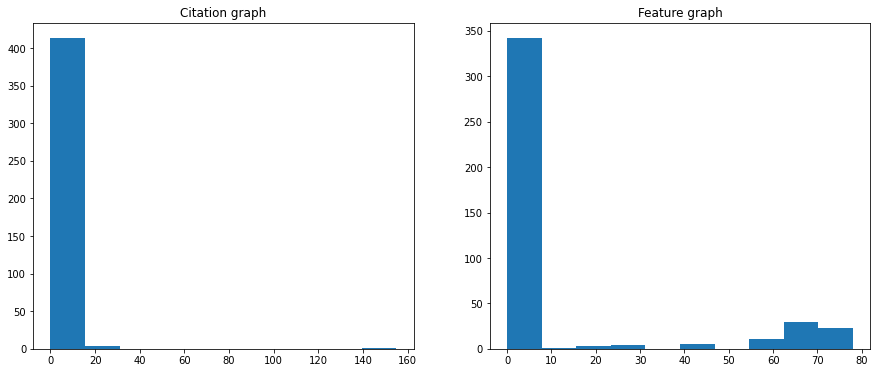

In [13]:
# Your solution here ###########################################################
citation_degrees = [G_citation.degree(i) for i in G_citation.nodes]
feature_degrees  = [G_feature.degree(i) for i in G_feature.nodes]
#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

fig, axes = plt.subplots(1, 2, figsize=(15, 6))
axes[0].set_title('Citation graph')
axes[0].hist(citation_degrees);
axes[1].set_title('Feature graph')
axes[1].hist(feature_degrees);

**6.2 [2pt]** Explain what the degree distribution tell us about a network. Then, discuss how to make a prediction on the network model type of the citation and the feature graph by looking at their degree distributions.

**Your answer here:** 

The degree distribution tells us how many nodes have each degree. In an Erdös-Renyi graph, most nodes have similar degrees, whereas, in real networks, such as the citation and feature graphs, we often see some nodes having much larger degrees than the rest of the nodes. Such degree distributions are often called fat-tailed; it indicates the presence of hubs in the network. These degree distributions can be fit through a power law and indicate a scale-free property. Some models, such as the Barabasi-Albert (BA) model, can generate networks with a scale-free property and, thus, fat-tail degree distributions. This indicates that the BA model could fit the citation and feature graphs well regarding degree distribution.

**6.3 [1pt]** Simulate a network using the configuration model to match the degree distribution of the feature exactly. Refer to [Configuration model](https://networkx.github.io/documentation/stable/reference/generated/networkx.generators.degree_seq.configuration_model.html#networkx.generators.degree_seq.configuration_model).


In [14]:
# Your solution here ###########################################################

G_config = nx.configuration_model(feature_degrees)

#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
print('Configuration model has {} nodes and {} edges.'.format(G_config.number_of_nodes(), G_config.size()))
print('Feature model has {} nodes and {} edges.'.format(G_feature.number_of_nodes(), G_feature.size()))

Configuration model has 418 nodes and 2364 edges.
Feature model has 418 nodes and 2364 edges.


**6.4 [2pt]** Explain if the graph generated by the configuration model is identical to the feature graph. If not, motivate how to understand if they are not the same.

In both case, verify your answer with a code.

**Your answer here:** 

The configuration model will rewire the links while keeping the same degree for each node. Some properties, such as the number of nodes and edges and the degree distribution, will remain the same. Nevertheless, the degree distribution does not contain all the information about the graph; some properties can thus change, such as the size of the giant component, the number of self-loops or the global efficiency.

In [15]:
# Your solution here ###########################################################
giant_feature = len(max(nx.connected_components(G_feature), key=len))
giant_config  = len(max(nx.connected_components(G_config), key=len))
selfloops_feature  = int(np.sum([1 for i in G_feature.edges if i[0]==i[1]]))
selfloops_config   = int(np.sum([1 for i in G_config.edges if i[0]==i[1]]))
GE_feature = nx.global_efficiency(G_feature)
GE_config = nx.global_efficiency(G_config)

print('\n\n\033[4mDifferent properties\033[0m (feature -- configurated)')
print(f'Giant component size: {giant_feature} -- {giant_config}')
print(f'Number of self-loops: {selfloops_feature} -- {selfloops_config}')
print(f'Global efficiency: {GE_feature} -- {GE_config}')


#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^



Different properties (feature -- configurated)
Giant component size: 82 -- 108
Number of self-loops: 0 -- 32
Global efficiency: 0.03262461800894207 -- 0.039204999636653415


**6.5 [2pt]** Which alternative model would you choose to match the degree distribution of the original network while mainitaining some structural similarities? 

**Your answer here:**

A hidden parameter model generates a scale-free network that has no self-loops or multi-links and preserves the degree distribution. This could fit our original network better than the configuration model as it does not contain self-loops or multi-links.

### Question 7 [11pt]: Clustering Coefficient and Watts-Strogatz model

Let us check the average clustering coefficient of the original citation and feature graphs. 

In [16]:
CC_cit = nx.average_clustering(G_citation)
CC_feat = nx.average_clustering(G_feature)
print("Clustering coefficient of citation graph:", CC_cit)
print("Clustering coefficient of feature graph:", CC_feat)

Clustering coefficient of citation graph: 0.31318396750074196
Clustering coefficient of feature graph: 0.17909022944594014


Let's compare it with the ER random netwrok model:

In [17]:
print("Clustering coefficient of ER graph", nx.average_clustering(G_er))

Clustering coefficient of ER graph 0.015507469982561436


**7.1 [2pt]** Explain what the clustering coefficient tell us about a network. Comment on how it compares to the random model.

**Your answer here:** 

The clustering coefficient tells us how nodes in a network tend to cluster together. A high clustering coefficient indicates that nodes form highly interconnected clusters in the graph. Random models have low clustering coefficients compared to real-world networks. 

**7.2 [2pt]** In order to model the relatively high cluster coefficient of the **citation** graph while still maintaining the "small world" feature you will now create a Watts-Strogatz (WS) graph to fit the citation graph. First, set the regularity parameter $k$ Explain your choice.

**Your answer here:**

The regularity parameter defines how many neighbors each node is linked to at the initialization of the model. We select this parameter such that the total number of links in the Watts-Strogatz (WS) graph equals the total number of links in the citation graph. The total number of links in the WS graph is:
 $ L_{WS} = \frac{k_{cit} \times n}{2}$. Which gives $k_{cit} = \frac{2 \times L_{WS}}{n} $. We replace $L_{WS}$ by the number of links in the citation graph since we want these two to be equal.

In [18]:
# Your solution here ###########################################################

k_cit = np.round(2*G_citation.number_of_edges()/n).astype(int)

#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

**7.3 [3pt]** In order to select the optimal randomness parameter $p$ of the WS model we should monitor the clustering coefficient (CC) of the model with respect to $p$. Explain what other property should be monitored. Write a code that create WS networks with values of $p$ from $0$ to $1$ and plot the values of the CC and the other parameter with respect to p.

*Note*: plot the x axis in decimal and logarithmic scale and scale the values of the properties by the value at $p=0$. Make sure to select enough points for $p$ in thr range $[0,1]$

**Your answer here:**

The second fundamental property of a small-world network is the average shortest path length. It indicates distances in the network and should be small to be considered small-world.

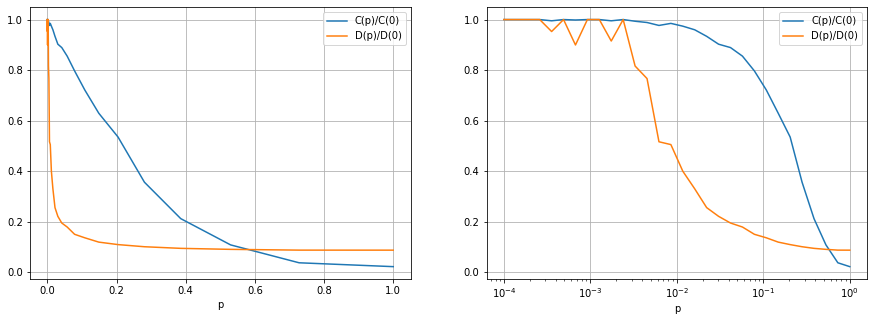

In [19]:
# Your solution here ###########################################################
probs = np.geomspace(0.0001,1, 30)
CCs   = []
Ls    = []


# Initial clustering and average short path
G  = nx.watts_strogatz_graph(n=n, k=k_cit, p=0)
C0 = nx.average_clustering(G)
L0 = nx.average_shortest_path_length(G)

for p in probs:
 G = nx.watts_strogatz_graph(n=n, k=k_cit, p=p)
 CCs.append(nx.average_clustering(G)/C0)
 Ls.append(nx.average_shortest_path_length(G)/L0)

fig, axs = plt.subplots(1,2, figsize=(15,5))
axs[0].plot(probs,CCs)
axs[0].plot(probs,Ls)
axs[0].legend(['C(p)/C(0)', 'D(p)/D(0)'])
axs[0].set_xlabel('p')
axs[0].grid()

axs[1].plot(probs,CCs)
axs[1].plot(probs,Ls)
axs[1].legend(['C(p)/C(0)', 'D(p)/D(0)'])
axs[1].set_xlabel('p')
axs[1].set_xscale('log')
axs[1].grid()
#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

**7.4 [3pt]** Compute the values of the monitored properties of the real citation graph and scale them by the corresponding values of the WS models at $p=0$. Which $p$ whould you select? Explain and generate the model with the chosen parameters. 

*Hint*: Notice the connected components of citation graph for the computaion of the other property. 

In [20]:
# Your solution here ###########################################################
L_cit  = nx.average_shortest_path_length(giant_citation)


print(f'Normalized clustering coefficient of the citation graph: {CC_cit/C0}')
print(f'Normalized average shortest path length of citation graph giant component: {L_cit/L0}')


G_ws = nx.watts_strogatz_graph(n=n, k=k_cit, p=0.2)
CC   = nx.average_clustering(G_ws)
L    = nx.average_shortest_path_length(G_ws)


print(f'Normalized clustering coefficient of G_ws: {CC/C0}')
print(f'Normalized average shortest path length of G_ws: {L/L0}')
#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

Normalized clustering coefficient of the citation graph: 0.6263679350014839
Normalized average shortest path length of citation graph giant component: 0.06757467641169539
Normalized clustering coefficient of G_ws: 0.5396901344269768
Normalized average shortest path length of G_ws: 0.11294460596903307


**Your answer here:**

We select $p$ according to our plot, such that the clustering coefficient is high while the average shortest path length is low. More precisely, we want these two values to be as close as possible to those for the citation graph. The ideal $p$ given these constraints is around $0.2$.

**7.5 [1pt]** Explain whether the Watts-Strogatz model provides a good fit for the feature graph.

*Hint*: Remember that the feature graph in this section is a pruned version. 

**Your answer here:**

Only looking at the clustering coefficient, the WS graph is quite similar to the feature graph. However, if we look in more details at the feature graph, we see that it contains over 300 disconnected nodes. This is highly incompatible with the small-world properties of the WS graph.

### Question 8 [8pt]: Comparison to Barabási-Albert (BA) model

**8.1 [2pt]** Explain how to determine the preferential attachment parameter for Barabási–Albert graphs. Define $q$ and build the BA graph. 

**Your answer here:** 

Neglecting $m_0$, the number of links in a BA graph equals $q \times n$, since there are $q$ edges added at each step. In order to have a similar number of edges in the BA graph as there are in the citation graph, we compute $q$ as follows :

$$
q = \frac{L_{citation}}{n}
$$

In [21]:
# Your solution here ###########################################################

q = round(G_citation.number_of_edges()/n)
print(q)

#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
G_ba = nx.barabasi_albert_graph(n, q)

2


Check the number of edges in the Barabási–Albert graph.

In [22]:
print('My Barabási-Albert network that simulates the citation graph has {} edges.'.format(G_ba.size()))

My Barabási-Albert network that simulates the citation graph has 832 edges.


**8.2 [2pt]** Plot the degree distribution histograms for the simulated networks (ER, BA, Configuration, WS).

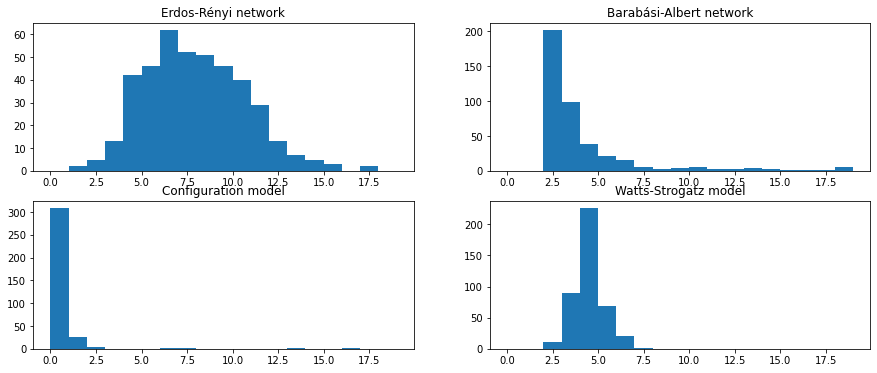

In [23]:
# Your solution here ###########################################################
er_degrees = [G_er.degree(i) for i in G_er.nodes]
ba_degrees = [G_ba.degree(i) for i in G_ba.nodes]
config_degrees = [G_config.degree(i) for i in G_config.nodes]
ws_degrees = [G_ws.degree(i) for i in G_ws.nodes]
#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

fig, axes = plt.subplots(2, 2, figsize=(15, 6))

bins = np.arange(20)
axes[0,0].set_title('Erdos-Rényi network')
axes[0,0].hist(er_degrees, bins=bins)
axes[0,1].set_title('Barabási-Albert network')
axes[0,1].hist(ba_degrees, bins=bins)
axes[1,0].set_title('Configuration model')
axes[1,0].hist(config_degrees, bins=bins)
axes[1,1].set_title('Watts-Strogatz model')
axes[1,1].hist(ws_degrees, bins=bins)
plt.show()

**8.3 [2pt]** Explain, in terms of the degree distribution, whether there is a good match between the citation and feature graphs and the simulated networks.
For the citation graph, choose one of the simulated networks above that match its degree distribution best and indicate your preference below.

**Your answer here:**

The ER and WS networks both result in Poisson degree distributions that do not match our real networks. 
In the case of the feature graph, the configuration model is the best fit in terms of degree distribution as it is an exact match by design.

The BA network results in a power law distribution that can account for the high degree node(s) present in the citation graph and feature graph. However, due to the fact that new nodes in the BA model are added with 2 edges, all nodes have a degree of 2 or higher. On the other hand, the majority of nodes in the citation graph have a single edge. 

Despite its differences, the BA model remains the best fit for the citation graph in terms of degree distribution.


Now, let us check the average clustering coefficient for the simulated networks.

In [24]:
print("Erdos-Renyi clustering coefficient:", nx.average_clustering(G_er))
print("Barabasi-Albert clustering coefficient:", nx.average_clustering(G_ba))
print("Configuration model clustering coefficient:", nx.average_clustering(nx.Graph(G_config)))
print("Watts-Strogatz model clustering coefficient:", nx.average_clustering(G_ws))

Erdos-Renyi clustering coefficient: 0.015507469982561436
Barabasi-Albert clustering coefficient: 0.04804777141527101
Configuration model clustering coefficient: 0.10631203426093011
Watts-Strogatz model clustering coefficient: 0.2698450672134884


**8.4 [2pt]** Comment on the values you obtain for the simulated networks. Motivate if there is any good match to the citation or feature graph in terms of clustering coefficient.

**Your answer here:**

The WS graph has the highest clustering coefficient as it is designed to model small-world networks, while the clustering coefficients of the other models are very low in comparison. The clustering coefficient value is close to that of the citation graph; in this regard, WS is a good match.

### Question 9 [13pt]: Network generating process

In this question we will design a network formation model for the directed citation graph, considering it as a growth process.

**9.1 [3pt]** Supposing that authors know all papers in their field at any time, how can we model their choice to cite each of them?

**Your answer here:**

If the authors know all papers at all times, then they can choose the optimal citation each time a new paper is written. We can imitate this behaviour using an optimization model. The principle is to define a cost function and link a new node so that the cost function is minimal. Reference [1] uses the following cost: 

$$
cost = \alpha \times d_{ij} + h_j
$$

Where $d_{ij}$ is the euclidean distance between the new node and node j, and $h_j$ is a measure of the centrality of node j. $\alpha$ is a parameter to weigh the importance of the euclidean distance relative to the centrality measure.

The papers must be quantifiable to measure distances between them, as they were in part A of the assignment when we had a feature matrix. Before the growth process, we initialize a random feature matrix representing a similar feature matrix as part A but for a fictitious scientific field.

For this exercise, we chose as a measure of the centrality the shortest path length to the first node (similar to [1]). The main reason for this choice is that it reduces computational costs. Nevertheless, one can also justify that choice by saying that the first paper of a field is usually a critical breakthrough of that field, and new papers will most likely revolve around that breakthrough.

[1] Fabrikant, A., Koutsoupias, E., & Papadimitriou, C. H. (2002). Heuristically optimized trade-offs: A new paradigm for power laws in the internet. In Automata, Languages and Programming: 29th International Colloquium, ICALP 2002 Málaga, Spain, July 8–13, 2002 Proceedings 29 (pp. 110-122). Springer Berlin Heidelberg.

**9.2 [5pt]** Define a function that takes as input the number of nodes $n$ and any other parameter you identified. This function iteratively grows a graph on $n$ nodes based on the formation model that you described in 9.1. You can add all additional arguments that you need.

In [25]:
# Your solution here ###########################################################
def my_formation_model(n_nodes: int, alpha):
  ''' Generate graph using the optimisation model
  Description: Nodes are added such that the cost function is minimized. 
  Cost function: alpha * dij + hj
  alpha : float - parameter giving the importance of dij
  dij   : float - euclidean distance between new node i and node j
  hj    : float - measure of centrality -> shortest path to central (=first) node

  INPUT
  -----
    n_nodes: int - number of nodes in the model
    alpha  : float - parameter for cost function

  OUTPUT
  ------
    numpy array - adjacency matrix
  '''

  # Initialize graph and features (for euclidean distances)
  G    = nx.DiGraph()
  feat = np.random.rand(n_nodes, 5)
  H    = np.zeros(n_nodes)                    # stores all shortest path length to central node

  # Each new node makes two links so we start with two nodes
  G.add_node(0)
  G.add_edge(1,0)
  H[1] = nx.shortest_path_length(G,1,0)

  # Add nodes
  for i in range(2, n_nodes):

    # Find the two target nodes having minimum cost
    centralities = H[:i]                                              # only select nodes that are not yet in graph (so before i with respect to H and feat)
    distances    = np.linalg.norm(feat[:i, :]-feat[i], axis=1)
    costs        = alpha * distances + centralities
    targets      = np.argsort(costs)[:2]

    # Add new node with link to target
    for t in targets:
      G.add_edge(i, t)

    # Add centrality of latest node to H
    H[i] = nx.shortest_path_length(G, i, 0)

  return nx.adjacency_matrix(G)

A_mymodel = my_formation_model(A_citation.shape[0], 100)              # alpha was selected after various trials

#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


**9.3 [1pt]** Check wether your graph is directed. If it is, make it undirected.

In [26]:
# Your solution here ###########################################################

A_mymodel = ((A_mymodel + A_mymodel.T) > 0).astype(int)

#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

**9.4 [2pt]** Compare the degree distributions of the citation graph and yours, then tune the paramters of your model to have a similar distribution.

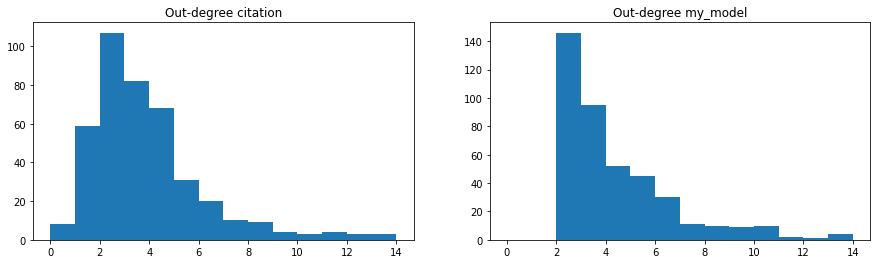

In [27]:
# Your solution here ###########################################################

degrees_citation = np.sum(A_citation, axis=0)
degrees_mymodel  = np.sum(A_mymodel, axis=0)

#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

fig, ax = plt.subplots(1, 2, figsize=(15, 4))

ax[0].set(title="Out-degree citation")
ax[0].hist(degrees_citation, bins=np.arange(15))

ax[1].set(title="Out-degree my_model")
ax[1].hist(degrees_mymodel, bins=np.arange(15))

plt.show()

**9.5 [2pt]** Compute and print the following metrics:
- Number of edges
- Giant component size and number of edges
- Clustering coefficient

In [28]:
# Your solution here ###########################################################

G_mymodel = nx.from_numpy_array(A_mymodel)
print('My model network that simulates the citation graph has {} edges.'.format(G_mymodel.size()))
giant_mymodel = G_mymodel.subgraph(max(nx.connected_components(G_mymodel), key=len)) # Your code here.
print('The giant component of my model network has {} nodes and {} edges.'.format(giant_mymodel.number_of_nodes(), giant_mymodel.size()))
print('The average clustering coefficient of my model network is {}.'.format(nx.average_clustering(G_mymodel)))

#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


My model network that simulates the citation graph has 833 edges.
The giant component of my model network has 418 nodes and 833 edges.
The average clustering coefficient of my model network is 0.35050606233057663.


### Question 10 [4pt]: Putting it all together

It is time to identify the best models for our graphs.

**10.1 [4pt]** Compare the metrics computed across all models and discuss which models provide the best fit to our two graphs and which are their shortcomings. Note that the best model could be different for the citation and feture graphs.

**Your answer here:**


The Erdos-Renyi model generates a graph with a degree distribution fitting a Poissonian distribution (omits hubs) and a low clustering coefficient compared to the citation and feature graph. The Erdos-Renyi model is usually unfit for real networks, such as the citation and feature, but it can serve as a baseline. 

The Watts-Strogatz model is the first tentative to imitate real networks, which includes higher clustering while keeping a "small world" property. The results show a closer clustering coefficient regarding the citation graph, but the degree distribution is still Poissonian, still not explaining the hubs in our real graphs. The next three models aim to generate a degree distribution similar to our real networks.

The configuration model mimics every node degree of the target graph but rewires the edges. Since the target was the feature graph, the configuration model's degree distribution is identical to the feature graph's degree distribution. The clustering coefficient remains similar. Consequently, the configuration model is an excellent fit for the feature graph, but that is not surprising since we started from the feature graph to generate it.

The second model concentrating on the degree distribution is the Barabási-Albert model. Its parameter was selected to generate a graph of similar size to the citation graph. The resulting network shows a similar degree distribution to the citation graph (power law distribution) but with a smaller clustering coefficient.

The optimization model generates a scale-free network; we tuned its parameter to fit our citation graph and ended with the best match regarding degree distribution and clustering coefficient. Amongst the considered models, the optimization model best fits the citation graph.

In this last model, we assumed that an author knows all papers in his/her field. This assumption is unrealistic, and authors only know a subset of the literature. We probably could have done better with the copy model since it assumes that "No scientist can be familiar with all papers published on a certain topic. Authors decide what to read and cite by "copying" references from the papers they have read." (as described in [2]).

[2] Network Science, by Albert-László Barabási